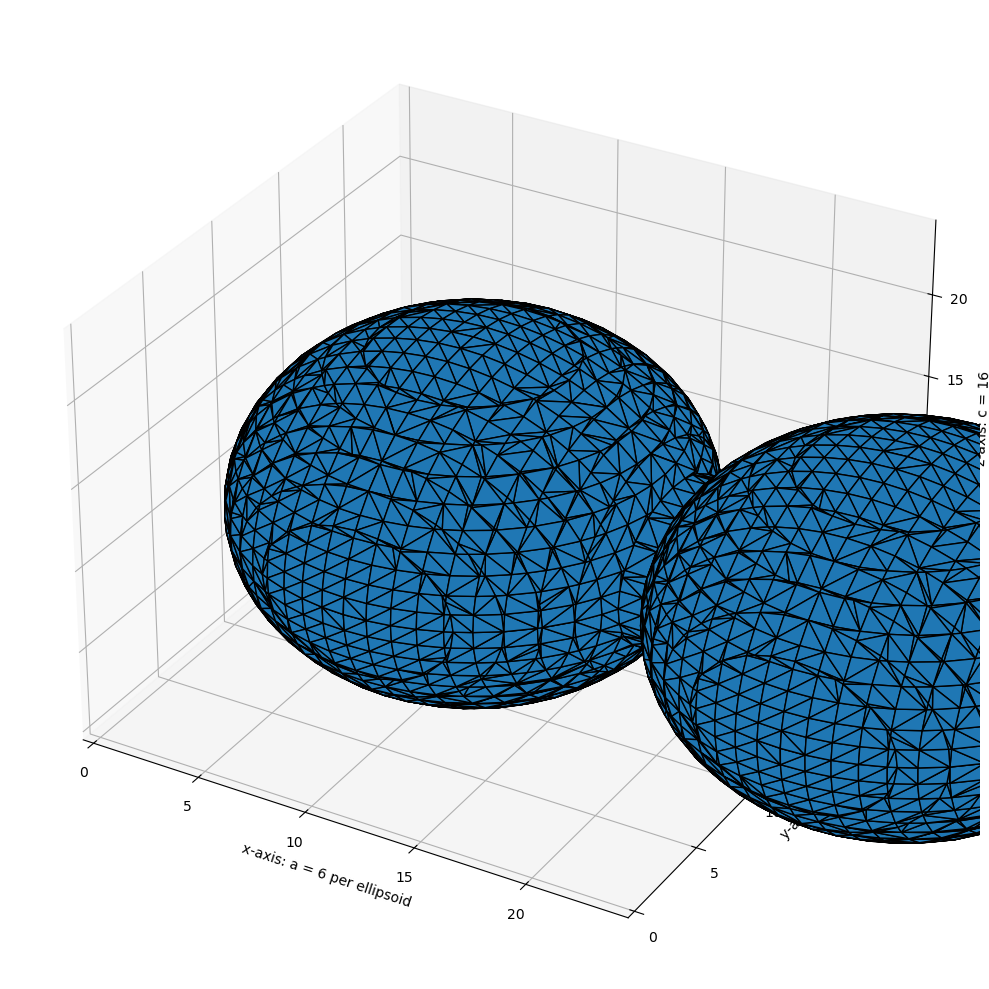

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid


# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(10, 10, 10, levelset=True)
ellip_double = np.concatenate((ellip_base[:-2, ...], ellip_base[2:, ...]), axis=0)

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes(ellip_double, 0)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 24)  # b = 10
ax.set_zlim(0, 24)  # c = 16

plt.tight_layout()
plt.show()

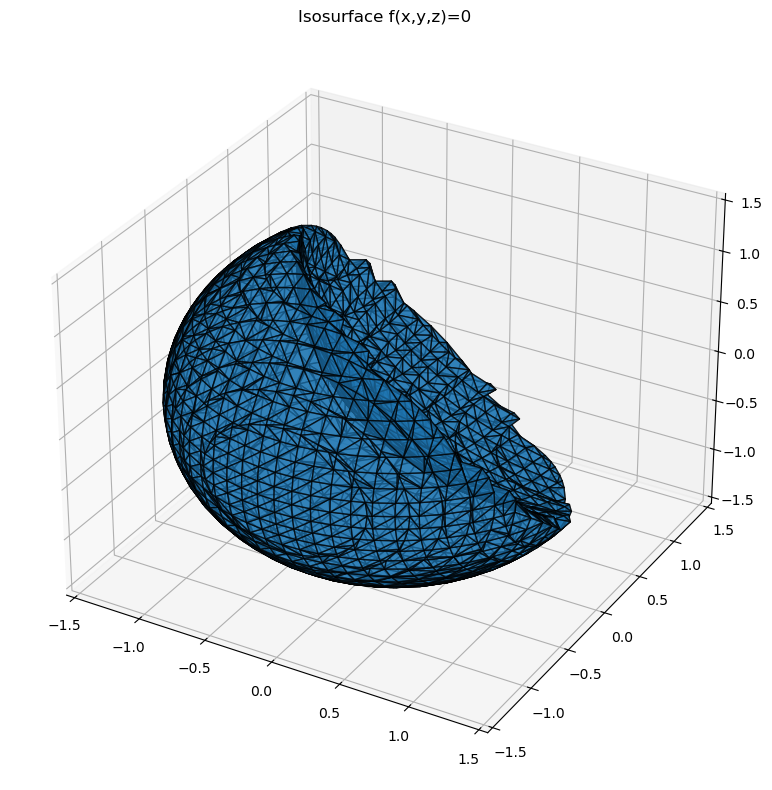

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage.measure import marching_cubes

# --- 1) Определяем неявную функцию f(x,y,z) ---
# Пример: сфера радиуса 1 (f(x,y,z) = x^2+y^2+z^2 - 1)

alfa = 1

def MyAnd(x,y):
    return (1/(1+alfa))*(x+y-(x*x+y*y-2*alfa*x*y)**0.5)
def MyOr(x,y):
    return (1/(1+alfa))*(x+y+(x*x+y*y-2*alfa*x*y)**0.5)

def f1(x, y, z):
    return 2.25 - x**2 - y**2 - z**2
def f2(x, y, z):
    return 4-(x-1)**2-(y-1)**2 - (z-1)**2     

def f(x, y, z):
    v1=f1(x,y,z)
    v2=f2(x,y,z)
    return MyAnd(v1,-v2)
# --- 2) Задаём объёмную сетку ---
n = 25  # разрешение по каждой оси
xmin, xmax = -1.5, 1.5
ymin, ymax = -1.5, 1.5
zmin, zmax = -1.5, 1.5

# создаём трёхмерную сетку координат
x = np.linspace(xmin, xmax, n)
y = np.linspace(ymin, ymax, n)
z = np.linspace(zmin, zmax, n)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")

# --- 3) Вычисляем значения f на сетке ---
volume = f(X, Y, Z)  # 3D массив размером (n,n,n)

# --- 4) Запускаем marching cubes для уровня 0 ---
verts, faces, normals, values = marching_cubes(volume, level=0.0)

# --- 5) Приводим индексы в реальные координаты ---
# marching_cubes выдаёт вершины в индексах массива,
# поэтому пересчитываем их по шагам dx, dy, dz:
dx = (xmax - xmin) / (n - 1)
dy = (ymax - ymin) / (n - 1)
dz = (zmax - zmin) / (n - 1)
verts = np.column_stack([
    xmin + verts[:, 0] * dx,
    ymin + verts[:, 1] * dy,
    zmin + verts[:, 2] * dz
])

# --- 6) Визуализируем ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(verts[faces], alpha=0.7)
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_zlim(zmin, zmax)
ax.set_title("Isosurface f(x,y,z)=0")
plt.tight_layout()
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage.measure import marching_cubes

# --- 1) Определяем неявную функцию f(x,y,z) ---
# Пример: сфера радиуса 1 (f(x,y,z) = x^2+y^2+z^2 - 1)


def f(x, y, z):
    ra = 1.0
    rb = 0.5
    d = 1.2
    # вычисление параметров
    a = (ra*ra - rb*rb + d*d) / (2.0 * d)
    b = (max(ra*ra - a*a, 0.0))**0.5

    # p = vec2(p2.x, length(p2.yz))
    px = x
    py = (y*y + z*z)**0.5

    # условие
    if px * b - py * a > d * np.max(b - py, 0.0):
        return ((px - a)**2 + (py - b)**2)**0.5
    else:
        return max(
            (px*px + py*py)**0.5 - ra,
            -(((px - d)**2 + py*py)**0.5 - rb)
        )
        
# --- 2) Задаём объёмную сетку ---
n = 25  # разрешение по каждой оси
xmin, xmax = -1.5, 1.5
ymin, ymax = -1.5, 1.5
zmin, zmax = -1.5, 1.5

# создаём трёхмерную сетку координат
x = np.linspace(xmin, xmax, n)
y = np.linspace(ymin, ymax, n)
z = np.linspace(zmin, zmax, n)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")

# --- 3) Вычисляем значения f на сетке ---
volume = f(X, Y, Z)  # 3D массив размером (n,n,n)

# --- 4) Запускаем marching cubes для уровня 0 ---
verts, faces, normals, values = marching_cubes(volume, level=0.0)

# --- 5) Приводим индексы в реальные координаты ---
# marching_cubes выдаёт вершины в индексах массива,
# поэтому пересчитываем их по шагам dx, dy, dz:
dx = (xmax - xmin) / (n - 1)
dy = (ymax - ymin) / (n - 1)
dz = (zmax - zmin) / (n - 1)
verts = np.column_stack([
    xmin + verts[:, 0] * dx,
    ymin + verts[:, 1] * dy,
    zmin + verts[:, 2] * dz
])

# --- 6) Визуализируем ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(verts[faces], alpha=0.7)
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_zlim(zmin, zmax)
ax.set_title("Isosurface f(x,y,z)=0")
plt.tight_layout()
plt.show()

<class 'TypeError'>: 'float' object cannot be interpreted as an integer